<center><h1>Regression

In [1]:
import numpy as np
from linearReg import linear_regression
from logisticReg import LogisticRegression

from accuracy import accuracy

import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# """"
# X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=10)
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=20)
# """"

In [3]:
"""
Importing Cars Datasets
"""
# Reading excel file
df = pd.read_csv("data/cars.csv")

X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])
X_train, X_test, Y_train ,Y_test = train_test_split(X,y , test_size=0.2,shuffle=True)


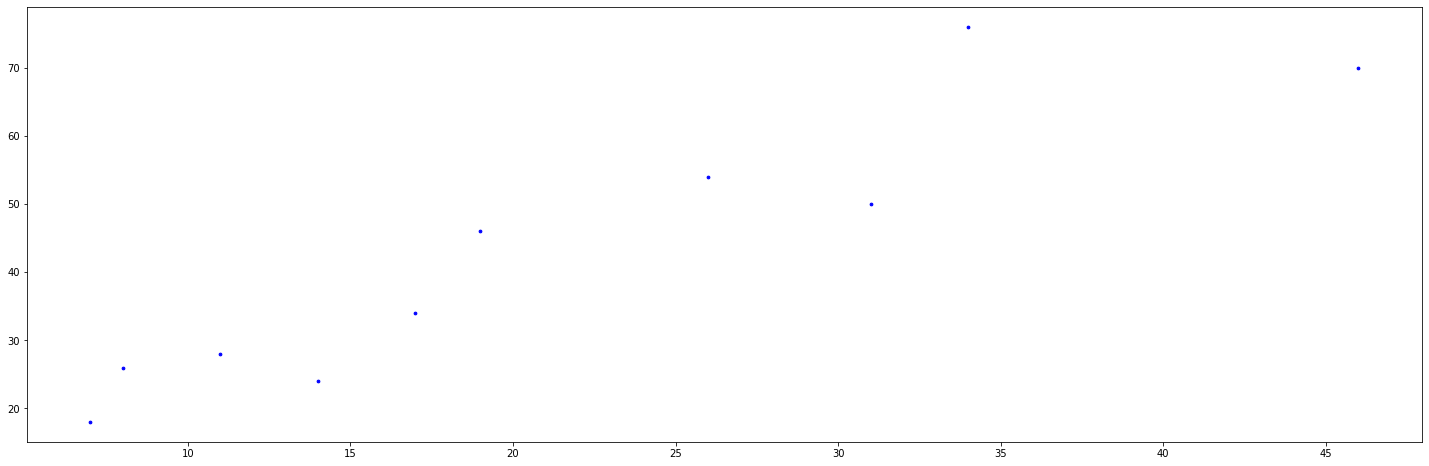

In [4]:
fig = plt.figure(figsize=(25,8))
plt.scatter(X_test[:,0],Y_test,color='b', marker=".",s=30)
plt.show()

## Linear Regression

In [5]:
linReg = linear_regression(lr=1e-5,n_iters=1000)
Weights_LR, Losses_LR = linReg.fit(X_train,Y_train,verbose=False)

6.173903203650699

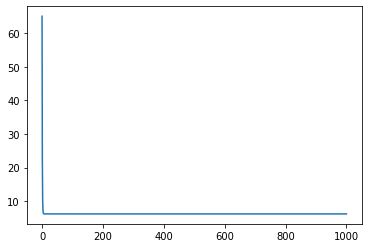

In [6]:
plt.plot(Losses_LR)
Losses_LR[-1]

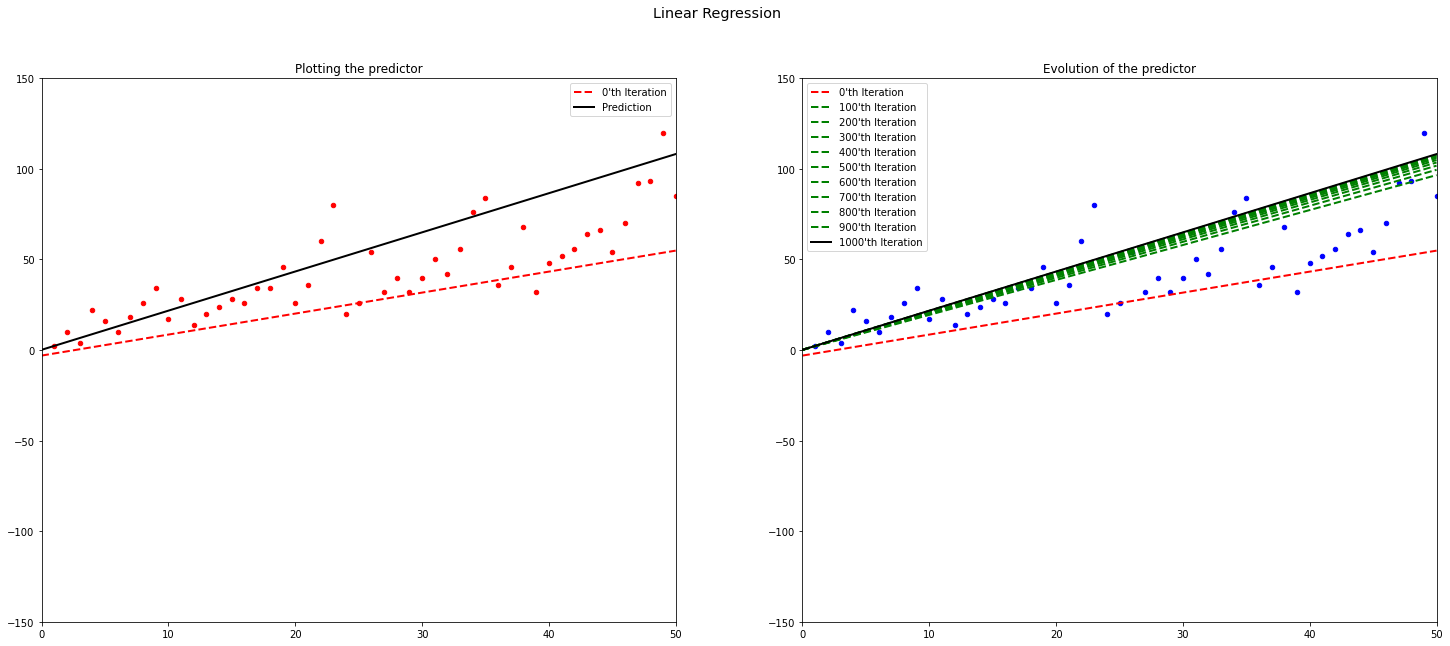

In [7]:
fig_reg,  ax_reg = plt.subplots(1, 2, figsize=(25,10))

ax_reg[0].set_xlim(0,50)
ax_reg[0].set_ylim(-150,150)

ax_reg[1].set_xlim(0,50)
ax_reg[1].set_ylim(-150,150)

ax_reg[0].scatter(X[:,0],y,color='r',s=20 )
ax_reg[1].scatter(X[:,0],y,color = 'b',s=20)



for i,line in enumerate(Weights_LR[::100]):
    b = line[0]
    W = line [1:]
    
    
    x0_min = 0                                # The choice of x0(min/max) is based on the interval of x where the data is located, in our case the data is distributed in 
                                                # the interval [-6, 4] over the x_axis
    x1_min = ((W[0]*x0_min) + b) / W[1]

    x0_max = 50
    x1_max = ((W[0]*x0_max) + b) / W[1]
    
     # # # Classifier Equation # # #
    #                               #
    #    x0*w0 + x1*w1 + b = 0      #
    #    x1*w1 = -b - x0*w0         #   
    #    x1 = -(b + x0*w0) / w1     #
    #                               #
     # # # # # # # # # # # # # # # # 
        
        
    # Y_hat = b + W*X_train
    
    if i == 10:
        c , ls, lw = 'k', '-', 2
        ax_reg[0].plot( [x0_min,x0_max] ,[x1_min,x1_max], c=c, ls=ls, lw=lw, label="Prediction")
        # ax_reg[0].plot(X_train[:,0],Y_hat, c=c, ls=ls, lw=lw, label='Prediction')
        
    elif i == 0 :
        c, ls, lw = 'r', '--', 2
        ax_reg[0].plot( [x0_min,x0_max] ,[x1_min,x1_max], c=c, ls=ls, lw=lw, label="0'th Iteration")
        # ax_reg[0].plot(X_train[:,0],Y_hat, c=c, ls=ls, lw=lw, label='0th Iteration')
        
    else:
        c , ls, lw = 'g', '--', 2
    ax_reg[1].plot([x0_min,x0_max], [x1_min,x1_max], c = c, ls=ls, lw=lw, label=f"{i*100}'th Iteration")
    # ax_reg[1].plot(X_train[:,0],Y_hat, c=c, ls=ls, lw=lw, label=f"{i*100}'th Iteration")
    
                        


ax_reg[0].set_title("Plotting the predictor")
ax_reg[1].set_title("Evolution of the predictor")

ax_reg[0].legend()
ax_reg[1].legend()

plt.suptitle("Linear Regression",fontsize="x-large")
plt.show()

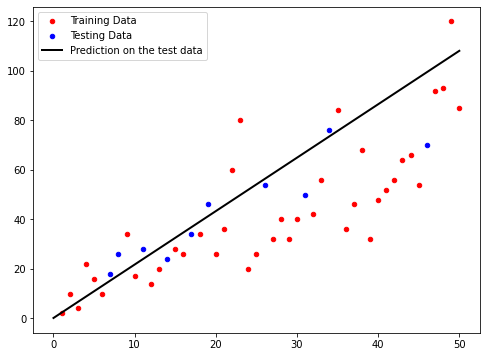

In [8]:
Y_predict = linReg.predict(X_test)
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train[:,0],Y_train,color='r',s=20,label='Training Data')
m2 = plt.scatter(X_test[:,0],Y_test,color='b',s=20,label='Testing Data')

b = linReg.weight[0]
W = linReg.weight[1:]

x0_min = 0                                
x1_min = ((W[0]*x0_min) + b) / W[1]

x0_max = 50
x1_max = ((W[0]*x0_max) + b) / W[1]

# plt.plot(X_test[:,0],Y_predict,color="black",linewidth=2,label='Prediction on the test data')
plt.plot([x0_min,x0_max], [x1_min,x1_max],'-',color="black",linewidth=2,label='Prediction on the test data')

plt.legend()
plt.show()

In [9]:
loss_test = np.mean((Y_test-Y_predict)**2)*(1/y.shape[0]) 

print(f"Predicted MSE : {loss_test}")

Predicted MSE : 2.0600752848267403


In [10]:
linReg = linear_regression(lr=1e-5,n_iters=1000)
Weights_LR, Losses_LR = linReg.fit(X_train,Y_train,verbose=False)

## Logistic Regression

## Approximation
$$f(x) = wx + b$$\
Sigmoid function <h4>$$s(x) = \frac{1}{1+e^{x}}$$

Approximation function $$\hat{y} = h_{\theta}(x) = \frac{1}{1+e^{-f(x)}} = \frac{1}{1+e^{-(xw+b)}}$$
## Cost Function
 1. Cross-Entropy Error <h4>$$J(w,b) = J(\theta) = \frac{1}{N} \sum_{i=1}^{n}{[y^i \log(h_{\theta}(x^i)) + (1 - y^i) \log(1 - h_{\theta}(x^i))]}$$
 2. Loss Function - as seen in the lecture\
    Since: <h4>$$P(y|x) = \frac{1}{1+ e^{-y <w,x>}}$$</h4>\
    It is clear that the loss function will increase monotonically if the probability $P(y|x)$ decreases.\
    This implies that, it will increse monotonically if $1+ e^{-y <w,x>}$ increases.
    Therefore, the loss function :\
 <h4>$$J(w,b) = log( 1+ e^{-y <w,x>})$$
 
    The ERM problem associated with logistic regression :
    <h4>$$argmin_{w}(L_s(h_w)) = argmin_{w\in{R^d}}(\frac{1}{m} \sum_{i=1}^{m}\log(1+ e^{-y_i <w,x_i>})) $$ To solve using gradient descent
    <h4>$$\nabla_{w}{L_s(h_w)} = \frac{-yx  e^{-y <w,x>}}{1+e^{-y <w,x>}}  $$ where $x = (1, x_1, x_2, ..., x_d)$
    
    
## Update Rule
<h4>$$w = w - \alpha . dw$$
<h4>$$b = b - \alpha . db$$

Where :
    
<h4>$$J^{'}(\theta) = \begin{bmatrix} \frac{dJ}{dw} \\ \frac{dJ}{db} \end{bmatrix} =\begin{bmatrix} {...} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum{2 x_i (\hat{y} - y_i)}\\ \frac{1}{N} \sum{2 (\hat{y} -y_i)} \end{bmatrix}$$


In [11]:
# """"
bc = datasets.load_breast_cancer()
Xl, Yl = bc.data, bc.target

Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(Xl, Yl, test_size=0.2, random_state=20)
# """"

In [12]:
# #Reading excel file
# df = pd.read_excel("data/pop.xlsx")

# Xl = np.array(df.iloc[:,:-1])
# Yl = np.array(df.iloc[:,-1])
# Xl_train, Xl_test, Yl_train ,Yl_test = train_test_split(Xl,Yl , test_size=0.2,shuffle=True)

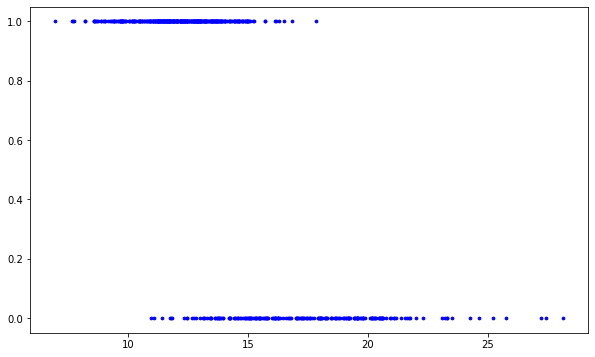

In [13]:
# """"
fig = plt.figure(figsize=(10,6))
plt.scatter(Xl[:,0],Yl,color='b', marker=".",s=30)
plt.show()

# fig = plt.figure(figsize=(10,6))
# plt.scatter(X_train[:,0],Y_train,color='b', marker=".",s=30)
# plt.show()

# """"

In [57]:
def accuracy (y_true, y_pred):
    return np.sum(y_true == y_pred)/ len(y_true)

In [58]:
logReg = LogisticRegression(lr=1e-5, n_iter=1000)
# logReg = logisticRegression(lr=0.001)
logReg.fit(Xl_train,Yl_train)

In [59]:
prediction = logReg.predict(Xl_test)
print(f"The accuracy of the Logitic regression model is : {accuracy(Yl_test,prediction)}")

The accuracy of the Logitic regression model is : 0.9122807017543859


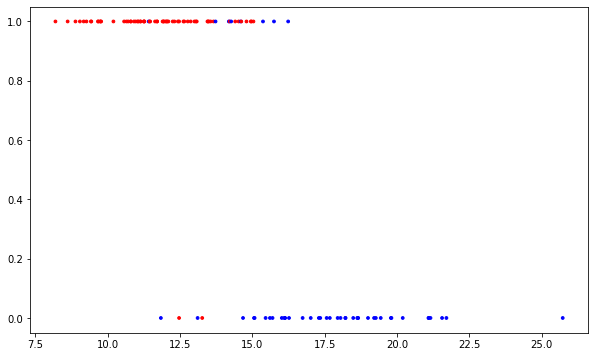

In [60]:
fig = plt.figure(figsize=(10,6))
plt.scatter(Xl_test[:,0],prediction,c=Yl_test,cmap='bwr', marker=".",s=30)
plt.show()
